<center>
    <h1>Tema 2: Aprendizaje Supervisado</h1>
    <br/>
    <h1>Regularización I</h1>
    <br/>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

## Demostración de sobreajuste sobre datos sintéticos 

### Crear un conjunto de datos basado en una función sinusoidal

Veamos un conjunto de datos sintéticos que consta de 30 puntos extraídos de la sinusoide $y = \sin(4x)$:

In [1]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

Crear valores aleatorios para x en el intervalo [0,1]

In [2]:
np.random.seed(98103)
n = 30
x = np.random.uniform(0, 1, size=n)
x = np.sort(x)

Calcular y. Y agregar ruido gaussiano aleatorio a y

In [3]:
def f(x):
    return np.sin(4 * x)
y = f(x) + np.random.normal(scale=0.3, size=n)

### Crear un dataframe de pandas.

In [4]:
data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,0.007306,0.168648
1,0.031659,0.291408
2,0.036159,0.700509
3,0.052886,-0.049021
4,0.140328,0.207561


### Crea una función para graficar los datos, ya que lo haremos muchas veces

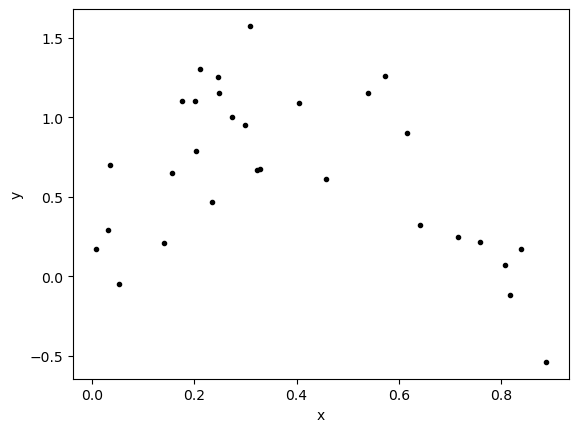

In [5]:
def graficar_data(data):    
    plt.plot(data['x'],data['y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

graficar_data(data)

## Definir algunas funciones útiles para la regresión polinomial
Función para generar los dataframe polinomiales

In [6]:
def polinomial_dataframe(atributo, grado):
    # asumir que grado es >= 1
    # inicializar el DataFrame:
    poli_dataframe = pd.DataFrame()
    # fijar poli_dataframe['potencia_1'] igual al atributo pasado
    poli_dataframe['potencia_1'] = atributo
    # chequear si grado > 1
    if grado > 1:
        # realizar un lazo con los grados restantes:
        for potencia in range(2, grado+1): 
            # primero le damos el nombre a la columna:
            nombre = 'potencia_' + str(potencia)
            # luego asignamos a poli_dataframe[nombre] la potencia del atributo apropiada
            poli_dataframe[nombre] = atributo**potencia
    return poli_dataframe

Definir una función para ajustar un modelo de regresión lineal polinomial de grado "grado" a los datos en "data":

In [7]:
def regresion_polinomial(data, grado):
    poli_data_X = polinomial_dataframe(data.x, grado)
    modelo = LinearRegression()
    modelo.fit(poli_data_X, y)
    return modelo

Definir la función para graficar los datos y las predicciones hechas, ya que vamos a usarlo muchas veces.

In [13]:
def graficar_predicciones_poly(data, modelo):
    graficar_data(data)
    
    # Graficar la verdadera relación entre X e y
    x_v = np.random.uniform(0, 1, size=200)
    x_v = np.sort(x_v)
    y_v = f(x_v)
    plt.plot(x_v, y_v, 'r-', label='relación real')
    
    # Obtener el grado del polinomio
    grado = len(modelo.coef_)
    
    # Crear 200 puntos en el eje x axis y calcular la predicción para cada punto
    x = np.random.uniform(0, 1, size=200)
    x = np.sort(x)
    x_pred = pd.DataFrame({'x': x})
    y_pred = modelo.predict(polinomial_dataframe(x_pred.x,grado))
    
    # graficar predicciones
    plt.plot(x_pred.x, y_pred, 'g-', label='ajuste de grado ' + str(grado))
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Cree una función que imprima los coeficientes polinomiales de una manera bonita :)

In [14]:
def imprimir_coefficientes(modelo):    
    # Obtener el grado del polinomio
    grado = len(modelo.coef_)

    # Obtener los parámetros aprendidos como una lista
    w = [modelo.intercept_]
    w += (modelo.coef_).tolist()
    # Numpy tiene un a función para imprimir polinomios de manera elegante
    # (La usaremos, pero necesita los parámetros en orden inverso)
    print ('Polinomio de grado ' + str(grado) + ':')
    w.reverse()
    print (np.poly1d(w))

## Ajustar un polinomio de grado 2

In [15]:
modelo = regresion_polinomial(data, grado=2)

Inspeccionar los parámetros aprendidos

In [16]:
imprimir_coefficientes(modelo)

Polinomio de grado 2:
        2
-6.047 x + 4.717 x + 0.1494


Formar y graficar nuestras predicciones a lo largo de una cuadrícula de valores x:

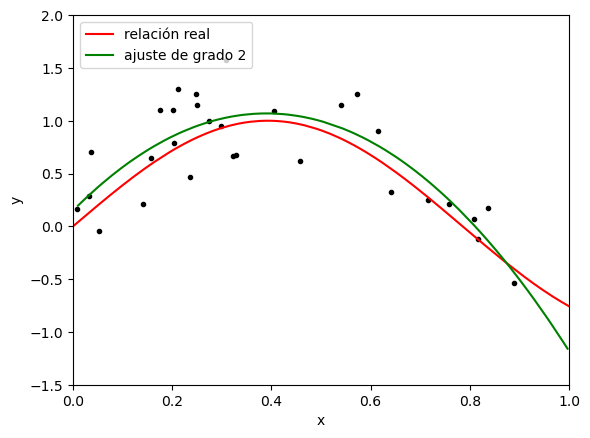

In [17]:
graficar_predicciones_poly(data, modelo)

## Calcular la media del error al cuadrado (MSE = mean squared error)

In [18]:
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,2))))

MSE =  0.08471573498461701


## Ajustar un polinomio de grado 4

Polinomio de grado 4:
        4         3         2
-1.366 x + 3.125 x - 8.299 x + 5.259 x + 0.1204
MSE =  0.08458427227062339


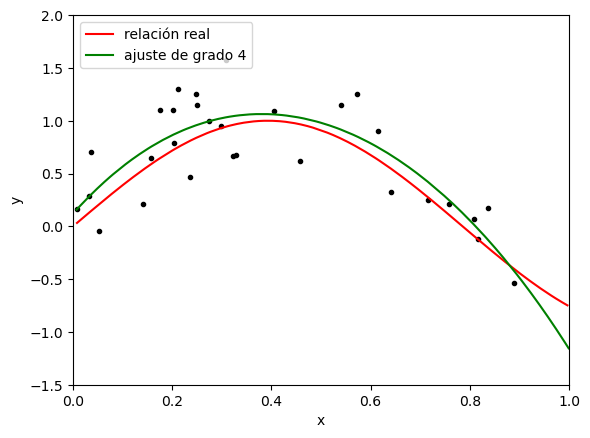

In [19]:
modelo = regresion_polinomial(data, grado=4)
imprimir_coefficientes(modelo)
graficar_predicciones_poly(data, modelo)
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,4))))

## Ajustar un polinomio de grado 8

Polinomio de grado 8:
            8             7             6             5             4
-1.192e+04 x + 3.974e+04 x - 5.286e+04 x + 3.558e+04 x - 1.261e+04 x
         3         2
 + 2176 x - 135.5 x + 1.609 x + 0.2985
MSE =  0.06820283083276293


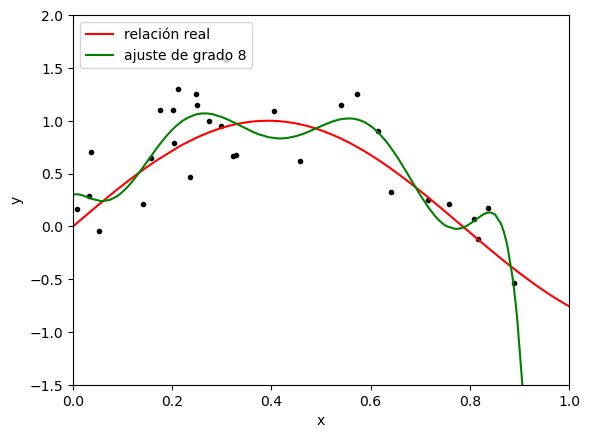

In [20]:
modelo = regresion_polinomial(data, grado=8)
imprimir_coefficientes(modelo)
graficar_predicciones_poly(data, modelo)
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,8))))

## Ajustar un polinomio de grado 16

Polinomio de grado 16:
           16             15           14             13             12
7.098e+09 x  - 4.998e+10 x  + 1.6e+11 x  - 3.079e+11 x  + 3.977e+11 x 
             11             10             9             8
 - 3.64e+11 x  + 2.431e+11 x  - 1.201e+11 x + 4.404e+10 x
              7             6             5             4             3
 - 1.191e+10 x + 2.339e+09 x - 3.237e+08 x + 3.017e+07 x - 1.756e+06 x
              2
 + 5.663e+04 x - 837.4 x + 3.866
MSE =  0.040564430020942024


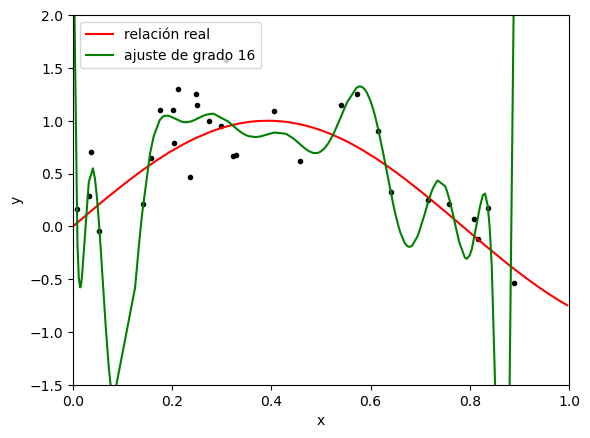

In [21]:
modelo = regresion_polinomial(data, grado=16)
imprimir_coefficientes(modelo)
graficar_predicciones_poly(data, modelo)
print('MSE = ', mean_squared_error(data.y, modelo.predict(polinomial_dataframe(data.x,16))))

Los coeficientes para el polinomio de grado 16 son de una magnitud altisima!!!!

## Demostración de sobreajuste sobre datos reales

En primer lugar, dividir los datos de ventas en cuatro subconjuntos de aproximadamente el mismo tamaño y llamarlos ventas_1, ventas_2, ventas_3 y ventas_4

In [22]:
ventas = pd.read_csv('../datos/kc_house_data.csv')
ventas = shuffle(ventas)

In [23]:
ventas_1 = ventas[:5403]
ventas_2 = ventas[5403:10806]
ventas_3 = ventas[10806:16209]
ventas_4 = ventas[16209:]

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_1

In [24]:
X_1 = ventas_1.sort_values(['sqft_living', 'price'])
poli_data_X = polinomial_dataframe(X_1.sqft_living, 15)
y_1 = X_1.price

Polinomio de grado 15:
           15             14             13             12
4.436e-16 x  + 1.171e-16 x  + 9.401e-16 x  + 6.762e-16 x 
              11             10             9            8
 + 3.945e-16 x  - 1.054e-15 x  + 3.886e-16 x + 2.31e-16 x
              7             6             5             4             3
 - 1.276e-15 x - 5.482e-16 x - 5.953e-14 x - 6.961e-10 x + 7.727e-06 x
            2
 + 0.03339 x + 1.334e-05 x + 2.928e+05

MSE =  58993462210.46738
RMSE =  242885.69783020855


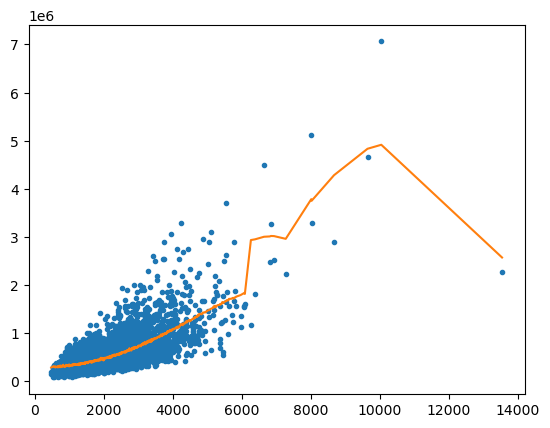

In [25]:
modelo = LinearRegression()
modelo.fit(poli_data_X, y_1)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_1, modelo.predict(poli_data_X))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X['potencia_1'],y_1,'.',
        poli_data_X['potencia_1'], modelo.predict(poli_data_X),'-')

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_2

In [26]:
X_2 = ventas_2.sort_values(['sqft_living', 'price'])
poli_data_X_2 = polinomial_dataframe(X_2.sqft_living, 15)
y_2 = X_2.price

Polinomio de grado 15:
           15             14             13             12
1.767e-16 x  - 3.351e-16 x  + 4.858e-16 x  + 7.422e-16 x 
              11             10             9             8
 - 4.287e-16 x  + 4.705e-17 x  + 3.725e-16 x + 7.815e-16 x
              7             6             5             4             3
 - 6.106e-17 x - 6.363e-16 x + 9.789e-15 x + 3.143e-10 x - 4.831e-06 x
            2
 + 0.06632 x + 2.75e-05 x + 2.497e+05

MSE =  60666952627.18499
RMSE =  246306.62318984643


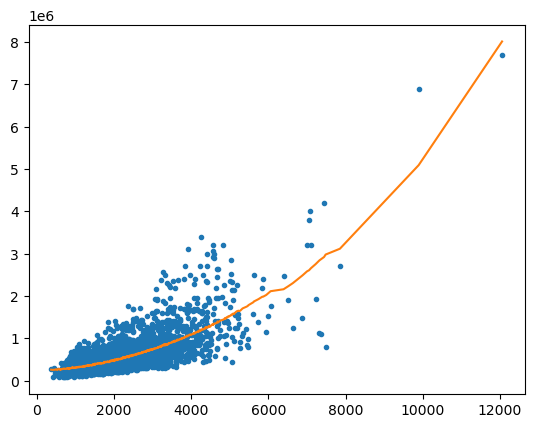

In [27]:
modelo = LinearRegression()
modelo.fit(poli_data_X_2, y_2)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_2, modelo.predict(poli_data_X_2))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X_2['potencia_1'],y_2,'.',
        poli_data_X_2['potencia_1'], modelo.predict(poli_data_X_2),'-')

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_3

In [28]:
X_3 = ventas_3.sort_values(['sqft_living', 'price'])
poli_data_X_3 = polinomial_dataframe(X_3.sqft_living, 15)
y_3 = X_3.price

Polinomio de grado 15:
           15             14             13             12
4.167e-16 x  - 1.301e-15 x  + 6.515e-16 x  + 1.164e-15 x 
              11             10             9             8
 + 4.137e-16 x  + 2.076e-16 x  - 6.149e-16 x + 4.801e-16 x
              7             6             5             4             3
 - 6.725e-16 x + 2.518e-16 x - 3.459e-14 x - 1.807e-09 x + 1.593e-05 x
            2
 + 0.02091 x + 1.079e-05 x + 2.962e+05

MSE =  58377783998.93396
RMSE =  241614.94986638133


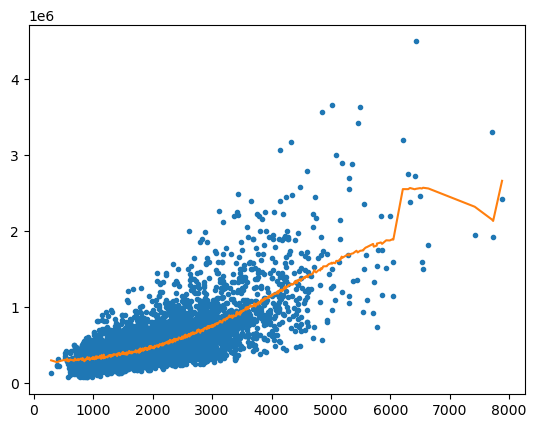

In [29]:
modelo = LinearRegression()
modelo.fit(poli_data_X_3, y_3)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_3, modelo.predict(poli_data_X_3))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X_3['potencia_1'],y_3,'.',
        poli_data_X_3['potencia_1'], modelo.predict(poli_data_X_3),'-')

### Ajustar un modelo polinomial de grado 15 al conjunto ventas_4

In [30]:
X_4 = ventas_4.sort_values(['sqft_living', 'price'])
poli_data_X_4 = polinomial_dataframe(X_4.sqft_living, 15)
y_4 = X_4.price

Polinomio de grado 15:
            15             14             13             12
-3.339e-16 x  + 7.907e-17 x  - 1.819e-16 x  + 2.758e-16 x 
              11             10             9             8
 + 2.812e-16 x  - 1.284e-16 x  - 7.561e-16 x - 2.163e-17 x
              7             6             5             4             3
 - 1.848e-16 x + 3.684e-16 x + 1.986e-14 x + 4.276e-10 x - 4.393e-06 x
            2
 + 0.06309 x + 3.042e-05 x + 2.561e+05

MSE =  64208543776.01109
RMSE =  253394.04842263184


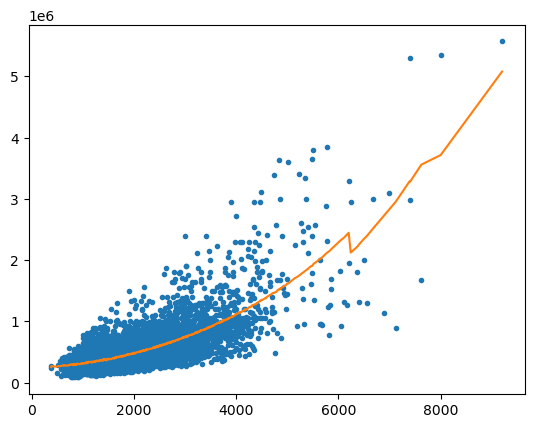

In [31]:
modelo = LinearRegression()
modelo.fit(poli_data_X_4, y_4)
imprimir_coefficientes(modelo)
print()
mse = mean_squared_error(y_4, modelo.predict(poli_data_X_4))
print('MSE = ', mse)
print('RMSE = ', math.sqrt(mse))
plt.plot(poli_data_X_4['potencia_1'],y_4,'.',
        poli_data_X_4['potencia_1'], modelo.predict(poli_data_X_4),'-')

# Regresión Ridge

La Regresión Ridge tiene como objetivo evitar el sobreajuste añadiendo un coste al término RSS de mínimos cuadrados estándar que depende de la norma 2 de los coeficientes $\| w \|$. El resultado es penalizar ajustes con grandes coeficientes. La fuerza de esta penalización, y por lo tanto el balance de complejidad vs. complejidad del modelo, se controla mediante un parámetro $\alpha$ (aquí llamado "Penalidad_L2").

  $J(\boldsymbol\beta) = \frac{1}{n}\sum_{i=0}^n (y_i - \boldsymbol\beta^T \mathbf{x}_i')^2 + \alpha \|\boldsymbol\beta\|_2$
  
 - $\alpha$ = 0:
         El objetivo se vuelve igual que la simple regresión lineal.
         Obtendremos los mismos coeficientes que la regresión lineal simple.
         
 - $\alpha = \infty$:
         Los coeficientes serán cero. ¿Por qué? Debido a una ponderación infinita del cuadrado de coeficientes, cualquier cosa menos de cero hará que el objetivo sea infinito.
         
 - $0 < \alpha < \infty$:
         La magnitud de $\alpha$ determinará la ponderación dada a diferentes partes del objetivo.
         Los coeficientes estarán entre 0 y unos para la regresión lineal simple.


In [32]:
from sklearn.linear_model import Ridge

Definir nuestra función para resolver el objetivo de la Regresión Ridge para un modelo de regresión polinomial de cualquier grado:

In [33]:
def regresion_ridge_polinomial(data, grado, penalidad_l2):
    poli_data_X = polinomial_dataframe(data.x, grado)
    modelo = Ridge(alpha=penalidad_l2)
    modelo.fit(poli_data_X, y)
    return modelo

## Realizar un ajuste de Regresion Ridge de un polinomio de grado 16 usando una penalidad muy pequeña

In [34]:
modelo = regresion_ridge_polinomial(data, grado=16, penalidad_l2=1e-25)
imprimir_coefficientes(modelo)

Polinomio de grado 16:
           16             15             14             13
5.741e+09 x  - 4.039e+10 x  + 1.292e+11 x  - 2.484e+11 x 
              12             11             10             9
 + 3.207e+11 x  - 2.933e+11 x  + 1.958e+11 x  - 9.668e+10 x
              8             7             6             5             4
 + 3.545e+10 x - 9.587e+09 x + 1.882e+09 x - 2.603e+08 x + 2.422e+07 x
              3            2
 - 1.403e+06 x + 4.48e+04 x - 651.6 x + 3.016


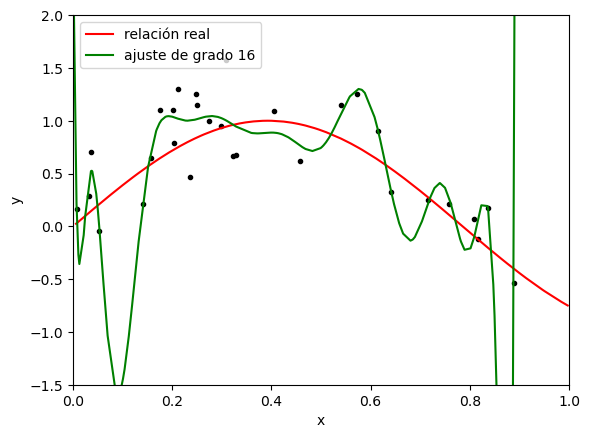

In [35]:
graficar_predicciones_poly(data, modelo)

## Realizar un ajuste de Regresion Ridge de un polinomio de grado 16 usando una penalidad alta

In [36]:
modelo = regresion_ridge_polinomial(data, grado=16, penalidad_l2=100)
imprimir_coefficientes(modelo)

Polinomio de grado 16:
           16            15            14            13           12
-0.002467 x  - 0.002856 x  - 0.003314 x  - 0.003853 x  - 0.00449 x 
             11            10           9            8            7
 - 0.005242 x  - 0.006133 x  - 0.00719 x - 0.008441 x - 0.009917 x
            6           5           4           3           2
 - 0.01164 x - 0.01362 x - 0.01575 x - 0.01769 x - 0.01816 x - 0.01309 x + 0.663


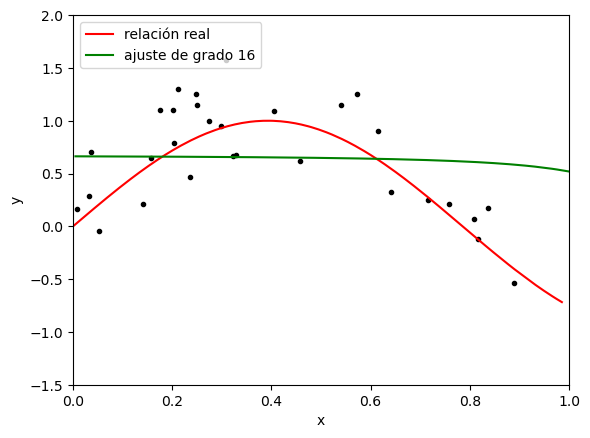

In [37]:
graficar_predicciones_poly(data, modelo)

## Veamos los ajustes para una secuencia de valores alfa en aumento

alpha = 1.00e-25
Polinomio de grado 16:
           16             15             14             13
5.741e+09 x  - 4.039e+10 x  + 1.292e+11 x  - 2.484e+11 x 
              12             11             10             9
 + 3.207e+11 x  - 2.933e+11 x  + 1.958e+11 x  - 9.668e+10 x
              8             7             6             5             4
 + 3.545e+10 x - 9.587e+09 x + 1.882e+09 x - 2.603e+08 x + 2.422e+07 x
              3            2
 - 1.403e+06 x + 4.48e+04 x - 651.6 x + 3.016


alpha = 1.00e-10
Polinomio de grado 16:
       16        15         14        13        12         11        10
509.6 x  + 2322 x  - 9.444 x  - 3071 x  - 3804 x  - 932.9 x  + 3782 x 
         9        8        7        6             5        4         3
 + 5767 x + 1044 x - 7020 x - 4838 x + 1.063e+04 x - 5191 x + 887.6 x
         2
 - 11.8 x - 3.863 x + 0.3649


alpha = 1.00e-06
Polinomio de grado 16:
        16         15         14         13         12         11
-94.93 x  - 51.19 x  - 6.794 x

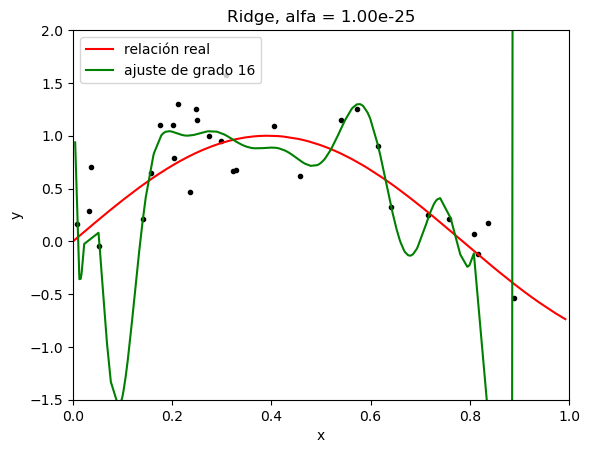

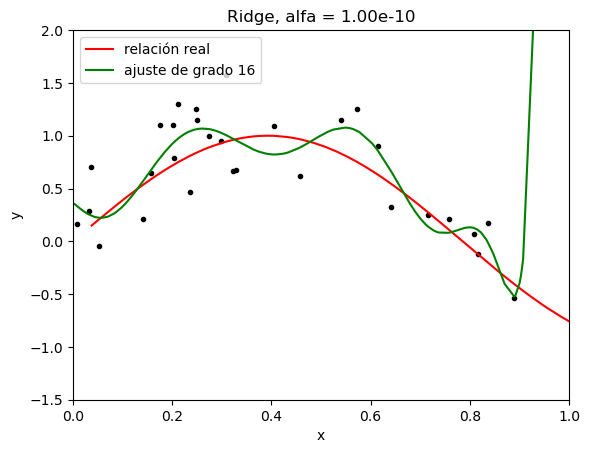

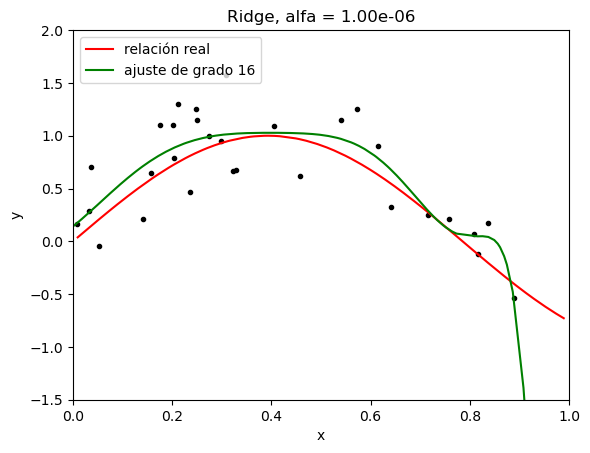

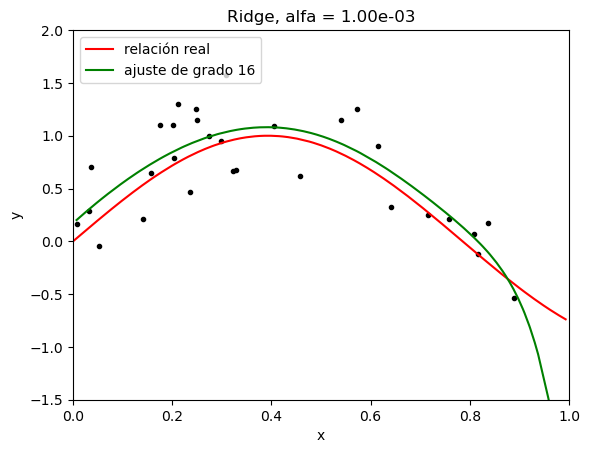

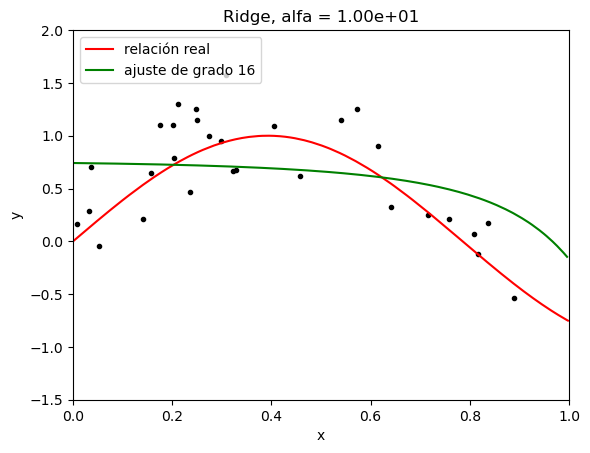

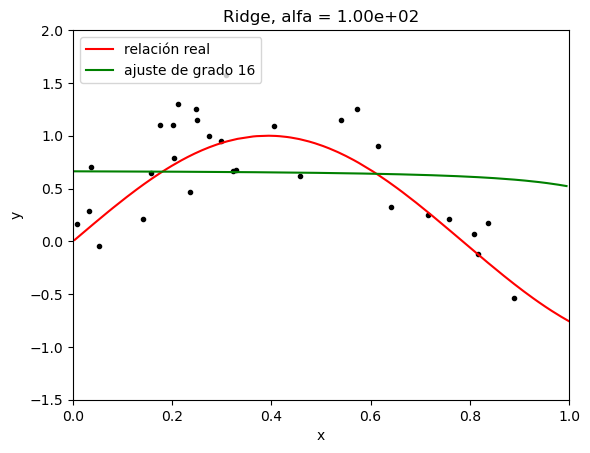

In [38]:
for alfa in [1e-25, 1e-10, 1e-6, 1e-3, 1e1, 1e2]:
    modelo = regresion_ridge_polinomial(data, grado=16, penalidad_l2=alfa)
    print ('alpha = %.2e' % alfa)
    imprimir_coefficientes(modelo)
    print ('\n')
    plt.figure()
    graficar_predicciones_poly(data, modelo)
    plt.title('Ridge, alfa = %.2e' % alfa)

# Regresión Lasso

La Regresión Lasso reduce conjuntamente los coeficientes para evitar el ajuste excesivo, e implica implícitamente la selección de los atributos estableciendo algunos coeficientes exactamente a 0 para una fuerza de penalidad suficientemente grande alfa (aquí llamada "penalidad_L1"). En particular, Lasso toma el término RSS de los mínimos cuadrados estándar y añade un coste de norma 1 de los coeficientes $\|w \|$.

In [39]:
from sklearn.linear_model import Lasso

Definir nuestra función para resolver el objetivo de la Regresión Lasso para un modelo de regresión polinomial de cualquier grado:

In [40]:
def regresion_lasso_polinomial(data, grado, penalidad_l1):
    poli_data_X = polinomial_dataframe(data.x, grado)
    modelo = Lasso(alpha=penalidad_l1)
    modelo.fit(poli_data_X, y)
    return modelo

## Explore la solución de la Regresión Lasso en función de diferentes valores de alfa

alpha = 1.00e-04
Polinomio de grado 16:
         6     3         2
0.02452 x - 0 x - 6.019 x + 4.681 x + 0.1556


alpha = 1.00e-03
Polinomio de grado 16:
        3        2
-2.471 x - 2.37 x + 3.207 x + 0.2909


alpha = 1.00e-02
Polinomio de grado 16:
        4     3     2
-1.808 x - 0 x - 0 x + 0.2161 x + 0.7568


alpha = 1.00e-01
Polinomio de grado 16:
 
0.6461


alpha = 1.00e+01
Polinomio de grado 16:
 
0.6461




/Users/wladimir/miniforge3/envs/AA2024/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e-03, tolerance: 7.537e-04
  model = cd_fast.enet_coordinate_descent(
/Users/wladimir/miniforge3/envs/AA2024/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.789e-04, tolerance: 7.537e-04
  model = cd_fast.enet_coordinate_descent(


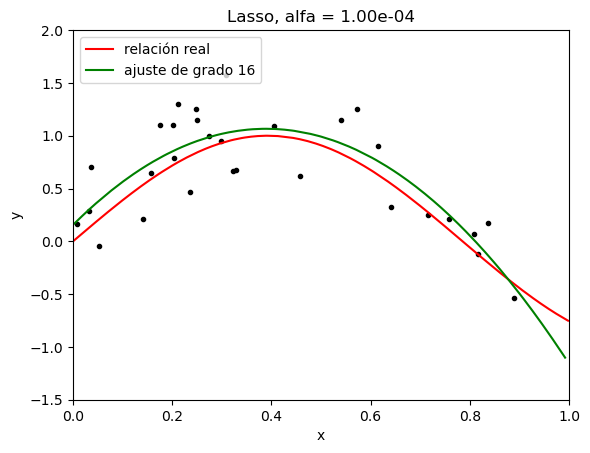

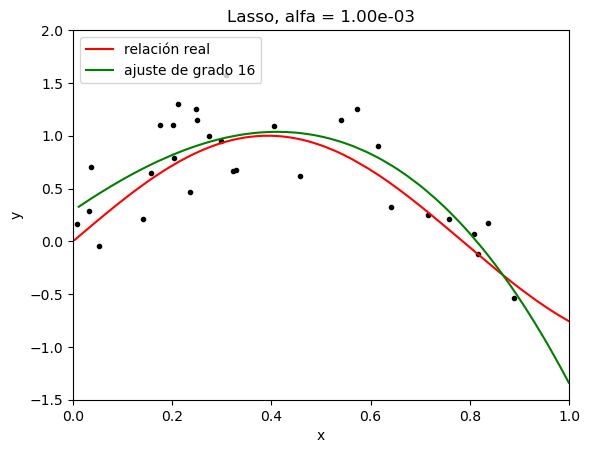

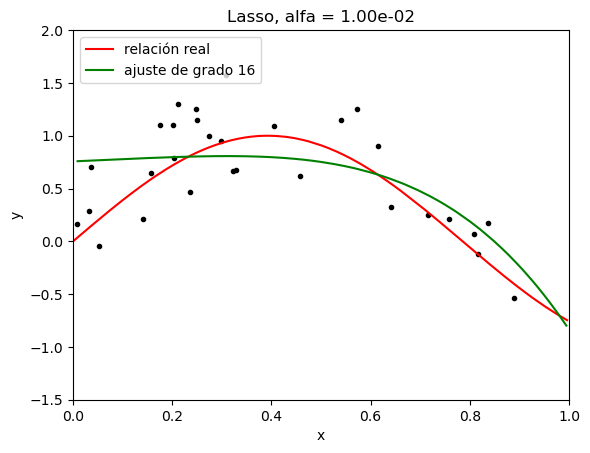

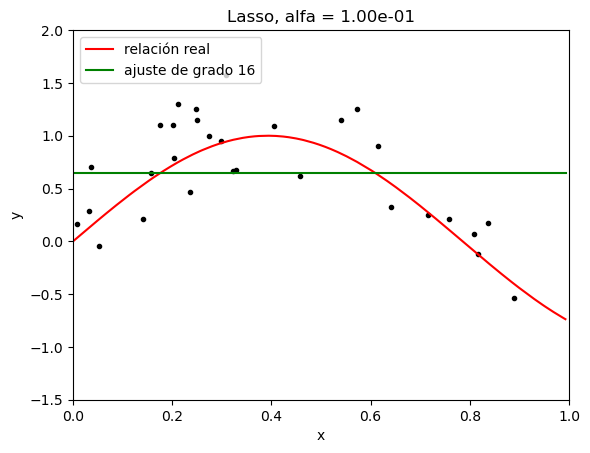

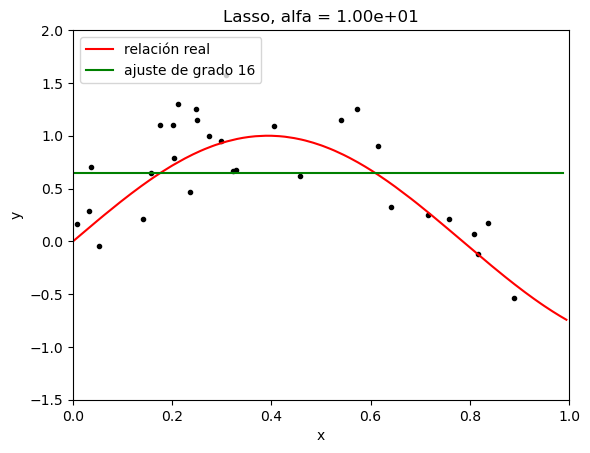

In [41]:
for alfa in [0.0001, 0.001, 0.01, 0.1, 10]:
    modelo = regresion_lasso_polinomial(data, grado=16, penalidad_l1=alfa)
    print ('alpha = %.2e' % alfa)
    imprimir_coefficientes(modelo)
    print ('\n')
    plt.figure()
    graficar_predicciones_poly(data, modelo)
    plt.title('Lasso, alfa = %.2e' % alfa)